# Implement Clustering Metrics Functions

In [17]:
def precision_bcubed(y_test, y_pred):
    m = y_test.shape[0]
    correctness = np.zeros((m, m))
    precision_bcubed = 0

    for i in range(m):
        for j in range(m - i):
            if i != j:
                if (
                    y_pred[i] == y_pred[j]
                    and y_test[i] == y_test[j]
                    or y_pred[i] != y_pred[j]
                    and y_test[i] != y_test[j]
                ):
                    correctness[i][j] += 1
                    correctness[j][i] += 1

        precision_bcubed += (sum(correctness[i][y_pred == y_pred[i]]) - 1) / (
            sum(y_pred == y_pred[i]) - 1
        )  # - 1 for the i = j case

        return precision_bcubed / m


def recall_bcubed(y_test, y_pred):
    return


def f1_bcubed(precision, recall):
    return

In [33]:
def silhouette(x, y_pred):
    clusters = np.unique(y_pred)
    dist_c = {}

    a = []
    b = []
    s = []
    for i in y_pred:
        dist_same = []
        for c in clusters:
            dist_c[c] = []

        for j in range(y_pred.shape[0]):
            if y_pred[i] == y_pred[j]:
                dist_same.append(np.linalg.norm(x[i] - x[j]))
            else:
                dist_c[y_pred[j]].append(np.linalg.norm(x[i] - x[j]))

        a.append(sum(dist_same) / (len(dist_same) - 1))
        b.append(min([np.mean(c) for c in dist_c.values() if len(c)]))


    s.append((b - a) / max(b, a))

    return np.mean(s)

# Experimenting

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler

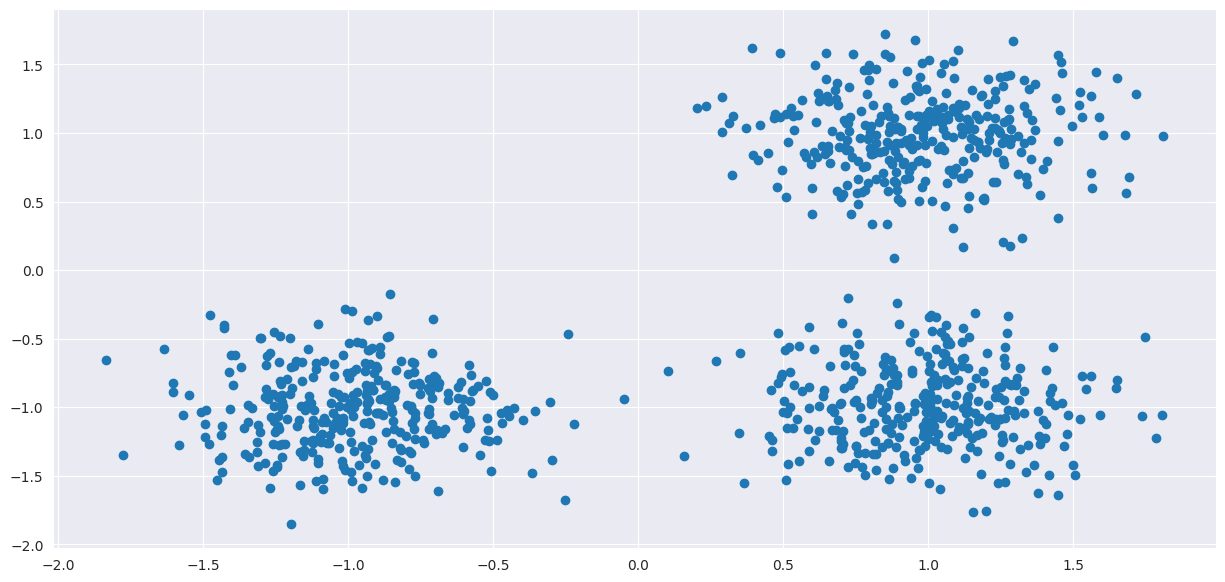

In [20]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.3, random_state=0
)
plt.figure(figsize=(15, 7))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.show()

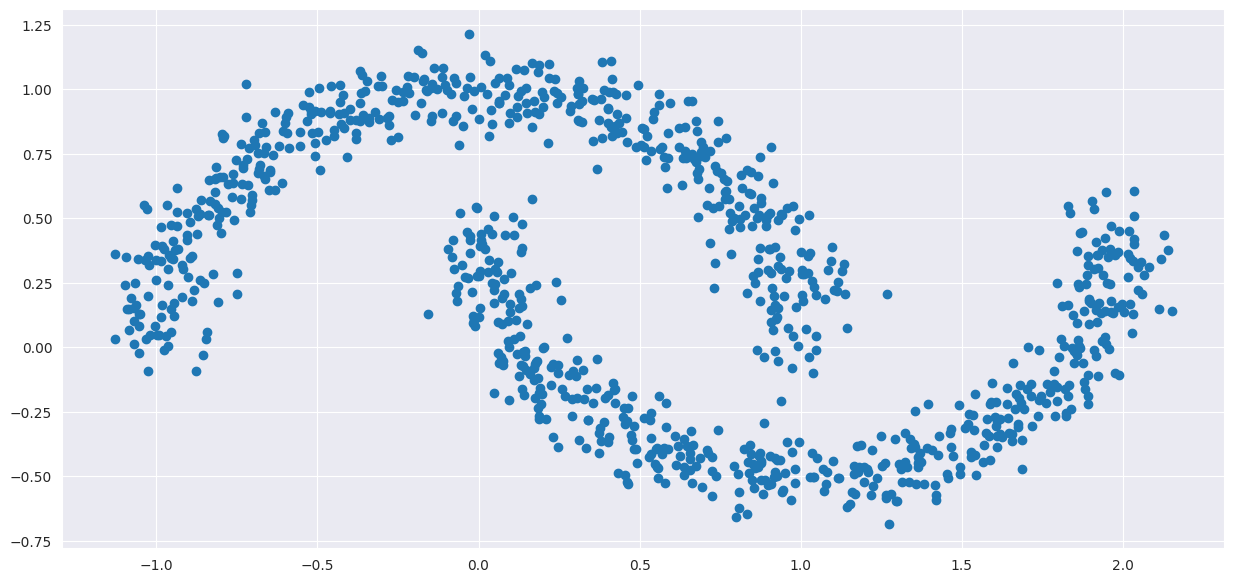

In [21]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=0)
plt.figure(figsize=(15, 7))
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.show()

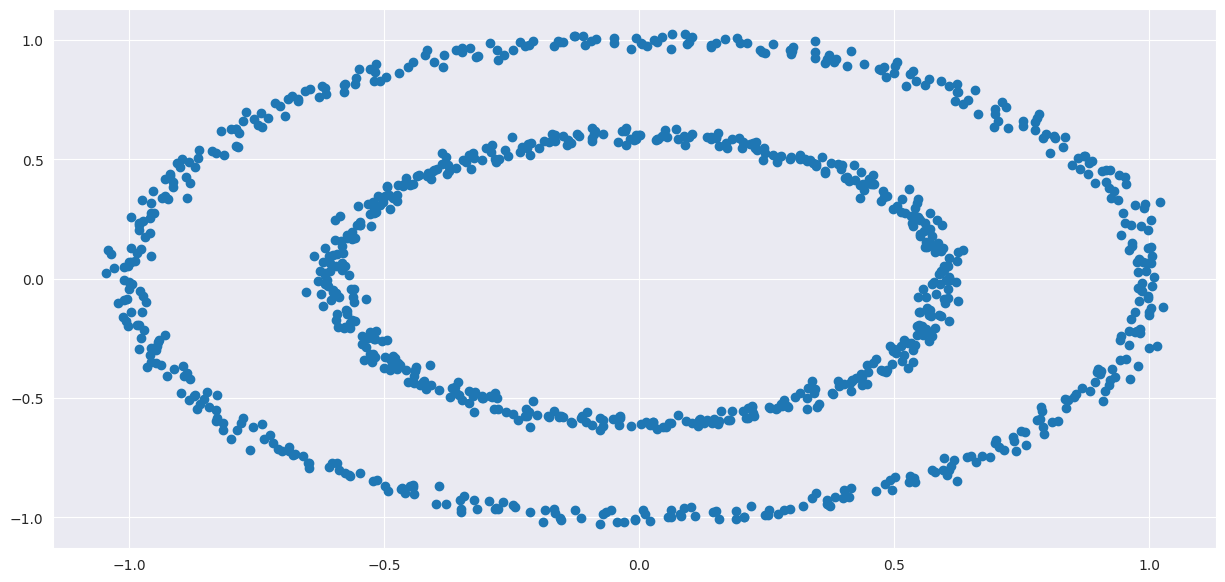

In [22]:
X_circles, y_circles = make_circles(
    n_samples=1000, noise=0.02, factor=0.6, random_state=0
)
plt.figure(figsize=(15, 7))
plt.scatter(X_circles[:, 0], X_circles[:, 1])
plt.show()

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

In [13]:
# Apply all this algorithms to 3 datasets above, plot the results
# Apply your implemented metrics on your predictions
# Check if the better result by plot brings the better score

In [28]:
km = KMeans(n_clusters=3).fit(X_circles)
y_pred = km.predict(X_circles)

In [30]:
precision_bcubed(y_circles, y_pred)

0.0004939759036144578

In [31]:
# todo ^ v

In [35]:
silhouette(X_circles, y_pred)

TypeError: unsupported operand type(s) for -: 'list' and 'list'